# Resolução da primeira lista de exercícios de Estatística Aplicada

## Instalação de bibliotecas

In [ ]:
!pip install stemgraphic
!pip install -q tabula-py

     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 11.7MB 8.7MB/s 


## Importação das bibliotecas

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tabula
import stemgraphic as stem
plt.style.use('ggplot')

## Questão 1

A MB Indústria e Comércio, desejando melhorar o nível de seus funcionários em cargos de chefia, montou um curso experimental e indicou 25 funcionários para a primeira turma. Os dados referentes à seção a que pertencem, notas e graus obtidos no curso estão na tabela a seguir. Como havia dúvidas quanto à adoção de um único critério de avaliação, cada instrutor adotou seu próprio sistema de aferição. Usando dados daquela tabela, responda às questões:

Extraindo a base de dados:

In [ ]:
dfs4 = tabula.read_pdf('_P. A. Morettin, W. de O. Bussab-Estatística Básica-Saraiva (2010).pdf',pages=43, stream=True)

Got stderr: Mar 30, 2021 4:09:40 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Mar 30, 2021 4:09:40 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Mar 30, 2021 4:09:40 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Mar 30, 2021 4:09:40 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:09:40 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:09:40 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:09:40 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:09:42 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:09:42 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Criando a base de dados.

In [ ]:
#extraindo a base de dados
df5=dfs4[0]
#excluindo as duas primeiras linhas
df5 = df5.drop([0])
#reindexando a base de dados
df5=df5.reset_index().drop(['index'], axis=1)

#definindo os meses de idade
lista1 = []
for i in df5.index:
  lista1.append(df5['Seção'][i][0:1])

#definindo a idade em anos
lista2 = []
for i in df5.index:
  lista2.append(df5['Seção'][i][2:5])

#criando as novas variável
df5['Seção (*)'] = lista1
df5['Administr.'] = lista2

#Excluindo a antiga coluna idade
df5 = df5.drop('Seção', axis=1)

#renomeando colunas
df5 = df5.rename(columns={'Unnamed: 0':'Func.', 'Unnamed: 1':'Direito', 'Unnamed: 2':'Redação', 'Unnamed: 3':'Estatíst.', 'Unnamed: 4':'Inglês',
                          'Unnamed: 5':'Metodologia', 'Unnamed: 6':'Política', 'Unnamed: 7':'Economia'})

#transformando a variável salário em float
lista3 = ['Direito','Redação','Estatíst.','Política','Economia','Administr.']
for i in lista3:
  df5[i] = df5[i].apply(lambda x: x.replace(',','.')).apply(lambda x: x.replace(' ','.')).astype('float64')

Base de dados criada.

In [ ]:
df5.head()

,Func.,Direito,Redação,Estatíst.,Inglês,Metodologia,Política,Economia,Seção (*),Administr.
0,1,9.0,8.6,9.0,B,A,9.0,8.5,P,8.0
1,2,9.0,7.0,9.0,B,C,6.5,8.0,P,8.0
2,3,9.0,8.0,8.0,D,B,9.0,8.5,P,8.0
3,4,9.0,8.6,8.0,D,C,6.0,8.5,P,6.0
4,5,9.0,8.0,9.0,A,A,6.5,9.0,P,8.0


#### (a) Após observar atentamente cada variável, e com o intuito de resumi-las, como você identificaria (qualitativa ordinal ou nominal e quantitativa discreta ou contínua) cada uma das 9 variáveis listadas?


**Variáveis qualitativas ordinais**: Inglês e Metodologia;

**Variável qualitativa nominal**: Seção;

**Variáveis quantitativas contínuas**: Administração, Direito, Redação, Estatística, Política e Economia.



#### (b) Compare e indique as diferenças existentes entre as distribuições das variáveis Direito, Política e Estatística.

**Resposta**

Não há variação nas notas de direito, pois todos os valores são 9.

A maior parte das notas de Estatísticas estão entre 8 e 10, com poucos valores baixos.

As notas de redação estão bem distribuídas.

As notas de Política estão estão em média, concentradas entre 6 e 6.5.

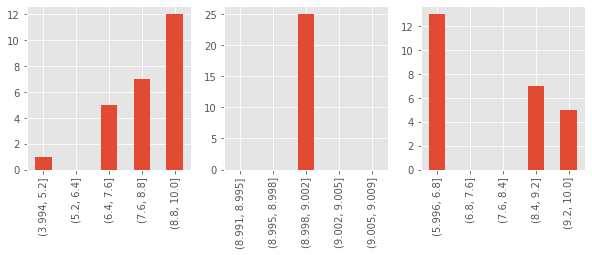

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(10,3))
pd.cut(df5['Estatíst.'], bins=5).value_counts(sort=False).plot.bar(ax=ax[0])
pd.cut(df5['Direito'], bins=5).value_counts(sort=False).plot.bar(ax=ax[1])
pd.cut(df5['Política'], bins=5).value_counts(sort=False).plot.bar(ax=ax[2]);

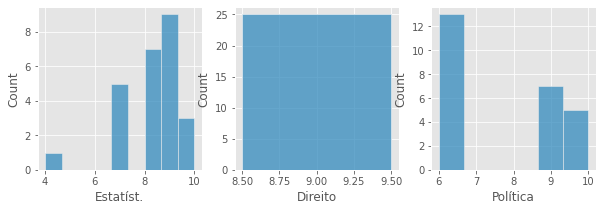

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(10,3))
sns.histplot(x='Estatíst.', data=df5, ax=ax[0])
sns.histplot(x='Direito', data=df5, ax=ax[1])
sns.histplot(x='Política', data=df5, ax=ax[2]);

#### (c) Construa o histograma para as notas da variável Redação.

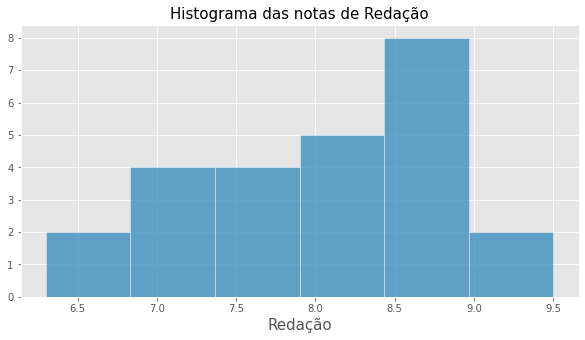

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='Redação', data=df5)
plt.xlabel('Redação', size=15)
plt.ylabel('')
plt.title('Histograma das notas de Redação',size=15);

#### (d) Construa a distribuição de freqüências da variável Metodologia e faça um gráfico para indicar essa distribuição.

In [ ]:
#tabela de frequência
freq = pd.DataFrame(df5['Metodologia'].value_counts(sort=False))
#frequência acumulada
freq['Met_acumulada'] = freq['Metodologia'].cumsum()
#frequência relativa
freq['Met_relativa'] = freq['Metodologia']/freq['Metodologia'].sum()
#frequência relativa acumulada
freq['Met_rel_acumulada'] = freq['Met_relativa'].cumsum()

freq

,Metodologia,Met_acumulada,Met_relativa,Met_rel_acumulada
C,10,10,0.40,0.40
B,8,18,0.32,0.72
A,7,25,0.28,1.00


In [ ]:
freq.T

,C,B,A
Metodologia,10.0,8.00,7.00
Met_acumulada,10.0,18.00,25.00
Met_relativa,0.4,0.32,0.28
Met_rel_acumulada,0.4,0.72,1.00


Gráfico da distribuição de frequência.

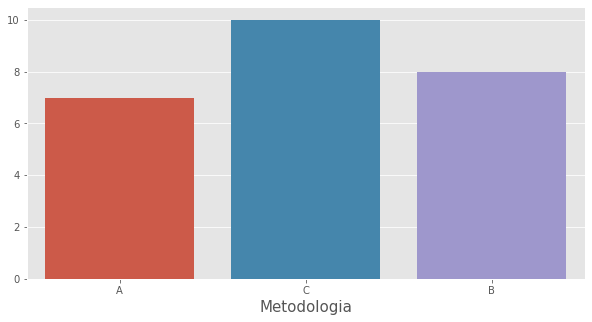

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Metodologia', data=df5)
plt.xlabel('Metodologia', size=15)
plt.ylabel("");

#### (e) Sorteado ao acaso um dos 25 funcionários, qual a probabilidade de que ele tenha obtido grau A em Metodologia?

**Resposta**: Calculando a probabilidade de que um dos 25 funcinários tenha obtido grau **A** em Metodologia é dado por $\frac{7}{25} = 0.28$, que calculei abaixo.


In [ ]:
print('A probabilidade de um dos 25 funcinários tenha obtido grau A em Metodologia é ',
      freq.T['A'][0]/freq.T['A'][1])

A probabilidade de um dos 25 funcinários tenha obtido grau A em Metodologia é  0.28


#### (f) Se, em vez de um, sorteássemos dois, a probabilidade de que ambos tivessem tido A em Metodologia é maior ou menor do que a resposta dada em (e)?

Essa resposta depende se o sorteio é com ou sem reposição. Vamos calcular as duas formas:

1) **com reposição**: Vamos sortear o funcionário e em seguido recolocá-lo novamente entre os funcionários para realizar um novo sorteio. Então na primeira eu terei $\frac{7}{25}$ e na segunda $\frac{7}{25}$, logo a probabilidade será  $\frac{7}{25} *  \frac{7}{25}$

In [ ]:
print('A probabilidade de dois dos 25 funcinários tenha obtido grau A em Metodologia é ', 
      round((freq.T['A'][0]/freq.T['A'][1])*(freq.T['A'][0]/freq.T['A'][1]),4))

A probabilidade de dois dos 25 funcinários tenha obtido grau A em Metodologia é  0.0784


2) **sem reposição**: Vamos sortear o funcionário, mas ele não será recolocado novamente entre os funcionários para realizar o novo sorteio. Então na primeira eu terei $\frac{7}{25}$ e na segunda $\frac{6}{24}$, logo a probabilidade será  $\frac{7}{25} *  \frac{6}{24}$.

In [ ]:
print('A probabilidade de dois dos 25 funcinários tenha obtido grau A em Metodologia é ', 
      round((freq.T['A'][0]/freq.T['A'][1])*((freq.T['A'][0]-1)/(freq.T['A'][1]-1)),4))

A probabilidade de dois dos 25 funcinários tenha obtido grau A em Metodologia é  0.07


#### (g) Como é o aproveitamento dos funcionários na disciplina Estatística, segundo a seção a que eles pertencem?

**Resposta**: Com base nos histogramas abaixo, vê-se que a seção de **Pessoal** possui um desempenho melhor em comparação as demais seções.

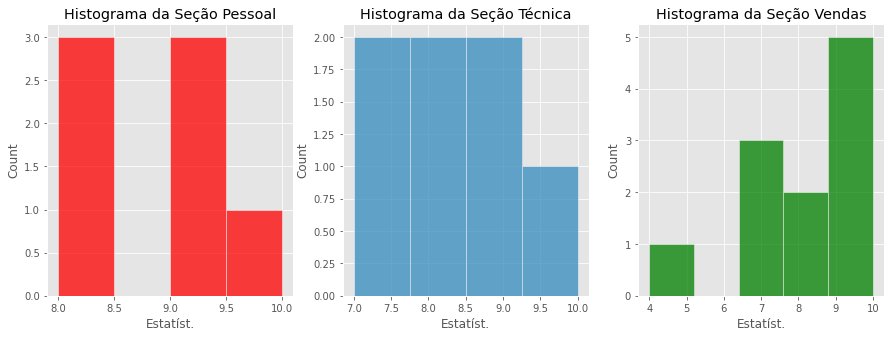

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
ax[0].title.set_text('Histograma da Seção Pessoal')
ax[1].title.set_text('Histograma da Seção Técnica')
ax[2].title.set_text('Histograma da Seção Vendas')
sns.histplot(df5[df5['Seção (*)']=='P']['Estatíst.'], ax=ax[0], color='red')
sns.histplot(df5[df5['Seção (*)']=='T']['Estatíst.'], ax=ax[1])
sns.histplot(df5[df5['Seção (*)']=='V']['Estatíst.'], ax=ax[2], color='green');

## Questão 2

Dispomos de uma relação de 200 aluguéis de imóveis urbanos e uma relação de 100 aluguéis rurais.

(a) Construa os histogramas das duas distribuições.

(b) Com base nos histogramas, discuta e compare as duas distribuições.

Extraindo a base de dados.

In [ ]:
dfs5 = tabula.read_pdf('_P. A. Morettin, W. de O. Bussab-Estatística Básica-Saraiva (2010).pdf',pages=45, stream=True)

Got stderr: Mar 30, 2021 4:19:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:19:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:19:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:19:07 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Mar 30, 2021 4:19:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:19:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:19:08 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:19:08 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:19:08 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Base de dados.

In [ ]:
df6 = dfs5[0][0:5]
df6

,Classes de aluguéis (codificados) Zona urbana,Zona rural
0,2 — 3 10,30.0
1,3 — 5 40,50.0
2,5 — 7 80,15.0
3,7 — 10 50,5.0
4,10 — 15 20,0.0


Transformando a base de dados.

In [ ]:
lista4 = [df6['Classes de aluguéis (codificados) Zona urbana'][0][6:12], df6['Classes de aluguéis (codificados) Zona urbana'][1][6:12], 
          df6['Classes de aluguéis (codificados) Zona urbana'][2][6:12], df6['Classes de aluguéis (codificados) Zona urbana'][3][7:12],
          df6['Classes de aluguéis (codificados) Zona urbana'][4][8:12]]

lista5 = [df6['Classes de aluguéis (codificados) Zona urbana'][0][:5], df6['Classes de aluguéis (codificados) Zona urbana'][1][:5], 
          df6['Classes de aluguéis (codificados) Zona urbana'][2][:5], df6['Classes de aluguéis (codificados) Zona urbana'][3][:6],
          df6['Classes de aluguéis (codificados) Zona urbana'][4][:7]]

#criando as novas variável
df6['Classes de aluguéis (codificados)'] = lista5
df6['Zona urbana'] = lista4
df6['Zona urbana'] = df6['Zona urbana'].astype('float64')

df6 = df6.drop('Classes de aluguéis (codificados) Zona urbana', axis=1)

df6 = df6[['Classes de aluguéis (codificados)','Zona urbana','Zona rural']]

df6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Classes de aluguéis (codificados),Zona urbana,Zona rural
0,2 — 3,10.0,30.0
1,3 — 5,40.0,50.0
2,5 — 7,80.0,15.0
3,7 — 10,50.0,5.0
4,10 — 15,20.0,0.0


#### (a) Construa os histogramas das duas distribuições.

Histogramas separados.

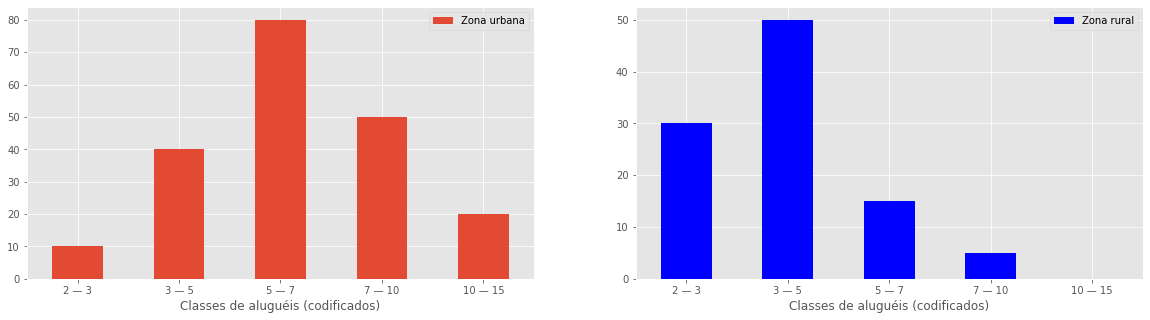

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
df6.plot.bar(x='Classes de aluguéis (codificados)', 
             y='Zona urbana', rot=0, ax=ax[0])
df6.plot.bar(x='Classes de aluguéis (codificados)', 
             y='Zona rural', rot=0, ax=ax[1], color='blue');

Histogramas no mesmo gráficos.

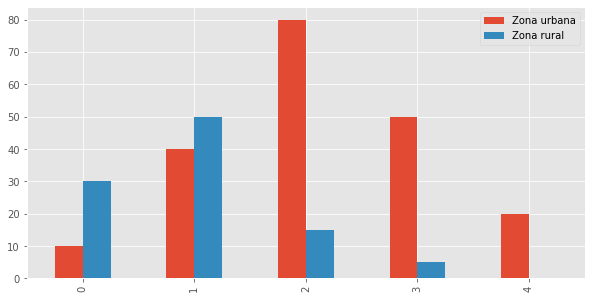

In [ ]:
df6[['Zona urbana','Zona rural']].plot.bar(figsize=(10,5));

#### (b) Com base nos histogramas, discuta e compare as duas distribuições.

**Resposta** : Pela escala em que se encontram os histogramas, vemos que os valores de aluguéis em zonas urbanas é maior que os aluguéis de zonas rurais.

## Questão 3

Um artigo retirado da revista Technometrics (Vol. 19, 1977, p. 425) apresenta os seguintes dados sobre a taxa de octanagem de várias misturas de gasolina:

|       ||     ||     ||    || ||       ||     ||     ||    || || ||
|:-----:||:---:||:---:||:--:||:-:||:-----:||:---:||:---:||:--:||:-:||:-:||
|   88,5|| 87,7|| 83,4|| 86,7 ||87,5 ||91,5 ||88,6 ||100,3 ||96,5 ||93,3 ||94,7 ||
|    91,1 ||91,0 ||94,2 ||87,8 ||89,9 ||88,3 ||87,6 ||84,3 ||86,7 ||84,3 ||86,7 ||
|    88,2 ||90,8 ||88,3 ||98,8 ||94,2 ||92,7 ||93,2 ||91,0 ||90,1 ||93,4 ||88,5||
|    90,1 ||89,2 ||88,3 ||85,3 ||87,9 ||88,6 ||90,9 ||89,0 ||96,1 ||93,3|| 91,8 ||
|  92,3|| 90,4|| 90,1|| 93,0|| 88,7|| 89,9 ||89,8 ||89,6 ||87,4 ||88,4 ||88,9 ||
|    91,2 ||89,3 ||94,4 ||92,7 ||91,8 ||91,6 ||90,4 ||91,1 ||92,6 ||89,8 ||90,6||
|  91,1|| 90,4|| 89,3 ||89,7|| 90,3 ||91,6 ||90,5 ||93,7 ||92,7 ||92,2 ||92,2||
|  91,2 ||91,0 ||92,2 ||90,0 ||90,7||

(a) Construa o diagrama de folhas-e-ramos para esses dados

(b) Construa a distribuição de frequência e o histograma. Use 8 intervalos de classe.

(c) Construa a distribuição de frequência e o histograma, agora com 16 intervalos de classe.

(d) Compare a forma dos dois histogramas em b e c. Ambos os histogramas mostram
informações similares?

Base de dados.

In [ ]:
lista1 = [88.5, 87.7, 83.4, 86.7, 87.5, 91.5, 88.6, 100.3, 96.5, 93.3, 94.7,
          91.1, 91.0, 94.2, 87.8, 89.9, 88.3, 87.6, 84.3, 86.7, 84.3, 86.7,
          88.2, 90.8, 88.3, 98.8, 94.2, 92.7, 93.2, 91.0, 90.1, 93.4, 88.5,
          90.1, 89.2, 88.3, 85.3, 87.9, 88.6, 90.9, 89.0, 96.1, 93.3, 91.8, 
          92.3, 90.4, 90.1, 93.0, 88.7, 89.9, 89.8, 89.6, 87.4, 88.4, 88.9,
          91.2, 89.3, 94.4, 92.7, 91.8, 91.6, 90.4, 91.1, 92.6, 89.8, 90.6,
          91.1, 90.4, 89.3, 89.7, 90.3, 91.6, 90.5, 93.7, 92.7, 92.2, 92.2,
          91.2, 91.0, 92.2, 90.0, 90.7]

df = pd.DataFrame(lista1, columns={'dados'})

df.head()

,dados
0,88.5
1,87.7
2,83.4
3,86.7
4,87.5


#### (a) Construa o diagrama de folhas-e-ramos para esses dados

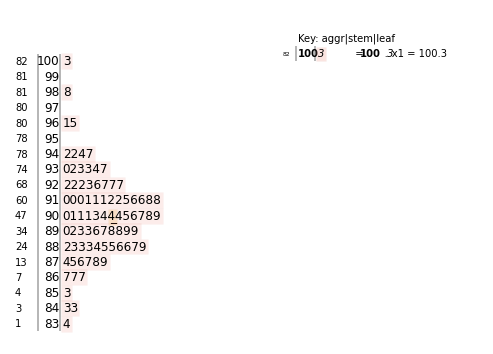

In [ ]:
stem.stem_graphic(df['dados'], scale = 1);

#### (b) Construa a distribuição de frequência e o histograma. Use 8 intervalos de classe.

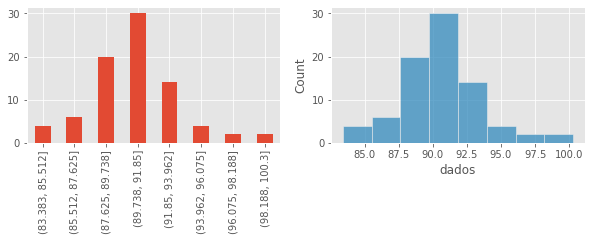

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,2.5))
pd.cut(df['dados'], bins=8).value_counts(sort=False).plot.bar(ax=ax[0])
sns.histplot(df['dados'], bins=8, ax=ax[1]);

#### (c) Construa a distribuição de frequência e o histograma, agora com 16 intervalos de classe.

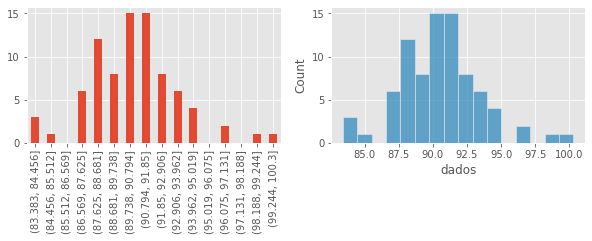

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,2.5))
pd.cut(df['dados'], bins=16).value_counts(sort=False).plot.bar(ax=ax[0])
sns.histplot(df['dados'], bins=16, ax=ax[1]);

#### (d) Compare a forma dos dois histogramas em b e c. Ambos os histogramas mostram informações similares?

**Resposta**: Pelos histogramas vemos que os valores de aluguéis em zonas urbanas são maiores que os aluguéis de zonas rurais. O número de aluguéis na classe $5 - 7$ é bem maior em zonas urbanas do que nas rurais.

## Questão 6

Estamos interessados em estudar a idade dos 12.325 funcionários da Cia. Distribuidora de Leite Teco, e isso será feito por meio de uma amostra. Para determinar que tamanho deverá ter essa amostra, foi colhida uma amostra-piloto. As idades observadas foram: 42, 35, 27, 21, 55, 18, 27, 30, 21, 24.

(a) Determine as medidas descritivas dos dados que você conhece.

(b) Qual dessas medidas você acredita que será a mais importante para julgar o tamanho final da amostra? Por quê?

In [ ]:
lista4 = [42,35, 27, 21, 55, 18, 27, 30, 21, 24]
df4 = pd.DataFrame(lista4, columns={'dados'})

####(a) Determine as medidas descritivas dos dados que você conhece.

In [ ]:
print('Medidas descritivas obtidas na amostra-piloto')
print(''*254)
print('Média :',df4['dados'].mean())
print('Mediana :',df4['dados'].median())
print('Moda :',df4['dados'].mode()[0])
print('Variância :',round(df4['dados'].var(),3))
print('Desvio padrão :',round(df4['dados'].std(),3))

Medidas descritivas obtidas na amostra-piloto

Média : 30.0
Mediana : 27.0
Moda : 21
Variância : 128.222
Desvio padrão : 11.324


#### (b) Qual dessas medidas você acredita que será a mais importante para julgar o tamanho final da amostra? Por quê?

**Resposta** : Das medidas acima, a mais importante para a determinação do tamanho da amostra final é a variância, pois fornece informação a respeito da variabilidade da variável Idade.

## Questão 7

A idade média dos candidatos a um determinado curso de aperfeiçoamento sempre foi baixa, da ordem de 22 anos. Como esse curso foi planejado para atender a todas as idades, decidiu-se fazer uma campanha de divulgação. Para se verificar se a campanha foi ou não eficiente, fez-se um levantamento da idade dos candidatos à última promoção, e os resultados estão na tabela a seguir.

Extração da base de dados.

In [ ]:
dfs6 = tabula.read_pdf('_P. A. Morettin, W. de O. Bussab-Estatística Básica-Saraiva (2010).pdf',pages=80, stream=True)

Got stderr: Mar 30, 2021 4:28:08 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:28:08 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:28:08 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:28:08 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Mar 30, 2021 4:28:08 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:28:08 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:28:10 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:28:10 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 4:28:10 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Base de dados.

In [ ]:
df7 = dfs6[1]
df7 = df7.rename(columns={'Freqüência':'Freq'})
df7 = df7.drop(5, axis=0)

lista5 = []
for i in df7[0:5].index:
  lista5.append((int(df7['Idade'][i][5:7])+int(df7['Idade'][i][0:2]))/2)

df7['Média']=lista5

df7

,Idade,Freq,Porcentagem,Média
0,18 — 20,18,36,19.0
1,20 — 22,12,24,21.0
2,22 — 26,10,20,24.0
3,26 — 30,8,16,28.0
4,30 — 36,2,4,33.0


Cálculo da média.

#### (a) Baseando-se nesses resultados, você diria que a campanha produziu algum efeito (isto é, aumentou a idade média)?

**Resposta**: Não, pois conforme cáculo abaixo a diferença entre a idade antes e depois é muito pequena.

In [ ]:
media = (1/df7['Freq'].sum())*(df7['Média'][0]*df7['Freq'][0] + 
                               df7['Média'][1]*df7['Freq'][1] + 
                               df7['Média'][2]*df7['Freq'][2] + 
                               df7['Média'][3]*df7['Freq'][3] + 
                               df7['Média'][4]*df7['Freq'][4])


print("Diferença entre a média após campanha e média anterior",
      round(media-22,2))

Diferença entre a média após campanha e média anterior 0.48


#### (b) Um outro pesquisador decidiu usar a seguinte regra: se a diferença $x$ – $22$ fosse maior que o valor $2dp(X)/\sqrt(n)$, então a campanha teria surtido efeito. Qual a conclusão dele, baseada nos dados?

Cálculo do desvio padrão.

In [ ]:
dp = ((df7['Freq']*((df7['Média']-media)**2)).sum()/50)**0.5
dp

3.8274795884498194

Pela questão "Se diferença $x_{média} – 22$ fosse maior que o valor $\frac{2dp}{\sqrt(50)}$, então a campanha teria surtido efeito". Comparando os resultados abaixo vemos que a campanha não surtiu efeito:

In [ ]:
if (media-22) > 2*dp/np.sqrt(50):
  print('A campanha surtiu efeito')
else:
  print('A campanha não surtiu efeito')

A campanha não surtiu efeito


#### (c) Faça o histograma da distribuição.

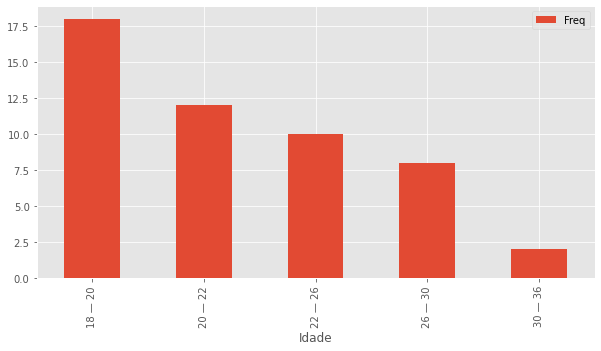

In [ ]:
df7.plot.bar(x='Idade', y='Freq', figsize=(10,5));

## Questão 8

Para se estudar o desempenho de duas corretoras de ações, selecionou-se de cada
uma delas amostras aleatórias das ações negociadas. Para cada ação selecionada,
computou-se a porcentagem de lucro apresentada durante um período fixado de tempo. 

Os dados estão a seguir.

In [ ]:
df8 = dfs6[0].rename(columns={'Unnamed: 0':'Corretora A ','Unnamed: 1':'Corretora A  ',
                              'Unnamed: 2':'Corretora B ','Unnamed: 3':'Corretora B  '})

#df9 = pd.concat(pd.DataFrame(df8['Corretora A ']),pd.DataFrame(df8['Corretora A']),pd.DataFrame(df8['Corretora A  ']))
df9 = df8['Corretora A '].append(df8['Corretora A  '].append(df8['Corretora A']))
df9 = pd.DataFrame(df9).dropna()

df10 = df8['Corretora B '].append(df8['Corretora B  '].append(df8['Corretora B']))
df10 = pd.DataFrame(df10).dropna()

Que tipo de informação revelam esses dados? (Sugestão: use a análise proposta nas Seções 3.3 e 3.4.).

**Análise**

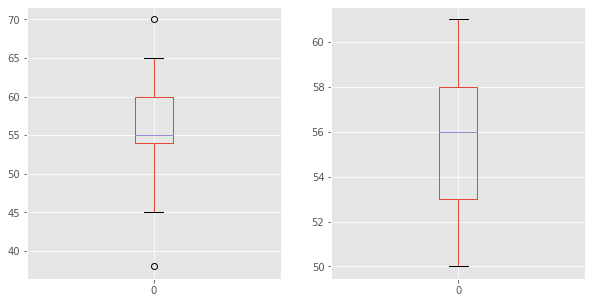

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
df9.boxplot(ax=ax[0])
df10.boxplot(ax=ax[1]);

Outra forma de plotar o *boxplot*.

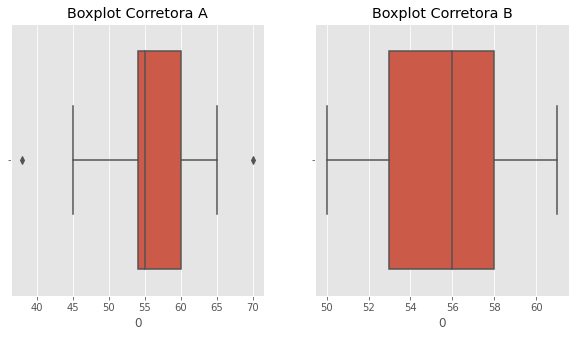

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].title.set_text('Boxplot Corretora A')
ax[1].title.set_text('Boxplot Corretora B')
sns.boxplot(x=0, data = df9, ax=ax[0])
sns.boxplot(x=0, data = df10, ax=ax[1]);

Métricas.

In [ ]:
print('O resumo de cinco números dos dados da corretora A')
print(''*254)
print('Mínimo :', df9.min()[0])
print('1º Quartil (0.25) :',df9[0].quantile(0.25))
print('2º Quartil (Mediana) :',df9[0].quantile(0.5))
print('3º Quartil (0.75) :',df9[0].quantile(0.75))
print('Máximo :', df9.max()[0])
print(''*254)
print('O resumo de cinco números dos dados da corretora B')
print(''*254)
print('Mínimo :', df10.min()[0])
print('1º Quartil (0.25) :',df10[0].quantile(0.25))
print('2º Quartil (Mediana) :',df10[0].quantile(0.5))
print('3º Quartil (0.75) :',df10[0].quantile(0.75))
print('Máximo :', df10.max()[0])

O resumo de cinco números dos dados da corretora A

Mínimo : 38.0
1º Quartil (0.25) : 54.0
2º Quartil (Mediana) : 55.0
3º Quartil (0.75) : 60.0
Máximo : 70.0

O resumo de cinco números dos dados da corretora B

Mínimo : 50
1º Quartil (0.25) : 53.0
2º Quartil (Mediana) : 56.0
3º Quartil (0.75) : 58.0
Máximo : 61


## Questão 9

Para decidir se o desempenho das duas corretoras do exercício 29 são semelhantes ou não, adotou-se o seguinte teste: sejam

$t = \frac{\overline{x_A} - \overline{x_B}}{S_{*}^{2}*\sqrt{\frac{1}{n_A} + \frac{1}{n_B}}}$

 $S_{*}^{2} = \frac{(n_A-1)var(X|A) + (n_B-1)var(X|B)}{n_A + n_B - 2}$

Caso |t|< 2, os desempenhos são semelhantes, caso contrário, são diferentes. Qual seria a sua conclusão? Aqui, $n_A$ é o número de ações selecionadas da corretora A e nomenclatura análoga para $n_B$.

Calculando $S_{*}^{2}$

In [ ]:
S = ((len(df9)-1)*df9.var() + (len(df10)-1)*(df10.var()))/(len(df10) + len(df9) - 2)
S[0]

32.50686400686401

Calculando *t*.

In [ ]:
t = (df9.mean() - df10.mean())/(S[0]*(np.sqrt(1/len(df9) + 1/len(df10))))
t[0]

0.028123521553959883

Conforme enunciado: "Caso |t|< 2, os desempenhos são semelhantes, caso contrário, são diferentes".

In [ ]:
if abs(t[0]) < 2:
  print('Os desempenhos das corretoras são semelhantes')
else:
  print('Os desempenhos das corretoras não são semelhantes')

Os desempenhos das corretoras são semelhantes


## Questão 10

No Problema 9, do Capítulo 2, temos os resultados de 25 funcionários em vários exames a que se submeteram. Sabe-se agora que os critérios adotados em cada exame não são comparáveis, por isso decidiu-se usar o desempenho relativo em cada exame. Essa medida será obtida do seguinte modo:

(I) Para cada exame serão calculados a média⎯x e o desvio padrão dp(X).
(II) A nota X de cada aluno será padronizada do seguinte modo:

$Z = \frac{X - \overline{x}}{dp(X)}$

#### (a) Interprete o significado de $Z$.

**Resposta**: Esse valor $Z$ é a nota padronizada, onde o valor 0 indica que o indivíduo em questão obteve a nota média. A nota $Z$ também fornece idéia sobre o desempenho de cada elemento com relação a todo o grupo.


#### (b) Calcule as notas padronizadas dos funcionários para o exame de Estatística.


In [ ]:
df5['Estat_z'] = (df5['Estatíst.']-df5['Estatíst.'].mean())/df5['Estatíst.'].std()
df5[['Estat_z']]

,Estat_z
0,0.584615
1,0.584615
2,-0.184615
3,-0.184615
4,0.584615
5,1.353846
6,-0.184615
7,-0.184615
8,0.584615
9,-0.184615


#### c) Com os resultados obtidos em (b), calcule $\overline{z}$ e $dp(Z)$.

**Resposta**: divisão pelo desvio-padrão, tem-se (Problema 21) que $\overline{z}$ = 0 e $dp(Z)$ = 1.

#### (d) Se alguma das notas padronizadas estiver acima de $2dp(Z)$ ou abaixo de $–2dp(Z)$, esse funcionário deve ser considerado um caso atípico. Existe algum nessa situação?

**Resposta**: O valor do desvio padrão é igual a 1, assim $2dp(Z)$ = 2 e  $-$ $2dp(Z)$ = -2. Para que que uma observação seja considerada atípica, ela deve estar fora desse intervalo e nesse caso a observação de valor $Z$ = -3,26; portanto, é uma observação atípica ou um \textit{outlier}.

#### (e) O funcionário 1 obteve 9,0 em Direito, em Estatística e em Política. Em que disciplina o seu desempenho relativo foi melhor?

**Resposta**: Para avaliar o seu desempenho relativo, é necessário comparar as notas padronizadas nas três disciplinas. 

1) Em Direito, todos obtiveram 9,0, então a nota padronizada é zero.

2) Em Política, a média das notas foi 7.76 e o desvio padrão foi o valor de 1.67, então a nota padronizada do funcionário 1 é 0.74. Com isso, seu desempenho relativo foi melhor em Política.